In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
from Model import *
from deepend.activations import *
from deepend.optimizers import *
from deepend.initializers import *

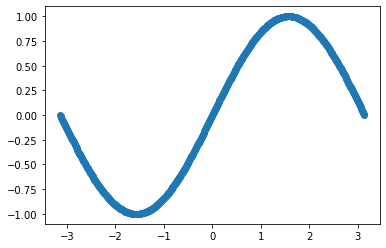

In [2]:
def train_function(x):
    return x, np.sin(x)
# define input sequence
xaxis = np.arange(-1*np.pi, 1*np.pi, 0.01)
ax_test = np.arange(8*np.pi, 10*np.pi, 0.01)
X,y = train_function(xaxis)
X_test,y_test = train_function(ax_test)
X = np.array([X])
plt.scatter(X,y)

In [3]:
X = np.reshape(X, (-1, 1))
y = np.reshape(y, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))
print(X.shape)
print(y.shape)

(629, 1)
(629, 1)


In [4]:
model = Model([
	Dense(1, 256),
	TanH(),
	Dense(256, 1)
])



# Set loss, optimizer and accuracy objects
model.compile(
	loss=MeanAbsoluteError(),
	optimizer=RMSProp(),
	metrics = ['accuracy']
)

model.summary()

─────────────────────────────────────────────────────────
Layer             Input Shape   Output Shape   Param #
dense_1 (Dense)   (1,)          (256,)         512    
─────────────────────────────────────────────────────────
tanh (TanH)       (256,)        (256,)         0      
─────────────────────────────────────────────────────────
dense_1 (Dense)   (256,)        (1,)           257    
Total Params: 769
Trainable Params: 769
Non-Trainable Params: 0
─────────────────────────────────────────────────────────



In [7]:
model.fit(X,y, 8, epochs=10)

Epoch 1/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  297.00it/s, 3.36ms/step] - accuracy: 0.000 - loss: 305.069</pre>'

Epoch 2/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  306.00it/s, 3.27ms/step] - accuracy: 0.000 - loss: 326.978</pre>'

Epoch 3/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  379.00it/s, 2.63ms/step] - accuracy: 0.000 - loss: 348.618</pre>'

Epoch 4/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  324.00it/s, 3.08ms/step] - accuracy: 0.000 - loss: 370.025</pre>'

Epoch 5/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  307.00it/s, 3.25ms/step] - accuracy: 0.000 - loss: 391.232</pre>'

Epoch 6/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  316.00it/s, 3.16ms/step] - accuracy: 0.000 - loss: 412.271</pre>'

Epoch 7/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  334.00it/s, 2.99ms/step] - accuracy: 0.000 - loss: 433.169</pre>'

Epoch 8/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  439.00it/s, 2.28ms/step] - accuracy: 0.000 - loss: 453.950</pre>'

Epoch 9/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  402.00it/s, 2.48ms/step] - accuracy: 0.000 - loss: 474.635</pre>'

Epoch 10/10


'<pre>100%|█████████████████████████| 79/79 [0:00:00 < 0:00:00,  438.00it/s, 2.28ms/step] - accuracy: 0.000 - loss: 495.241</pre>'

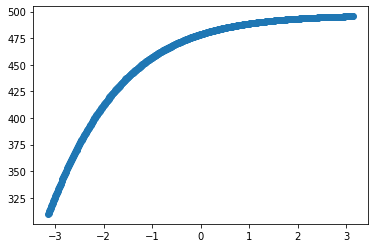

In [8]:
plt.scatter(X, model.predict(X))

In [7]:
l1 = Dense(1, 128)
act1 = TanH()
l2 = Dense(128, 1)
act2 = ReLU()

loss = MeanAbsoluteError()
opt = RMSProp()

def forw(data, training):
	l1.forward(data, training)
	act1.forward(l1.output, training)
	l2.forward(act1.output, training)
	act2.forward(l2.output, training)

for i in range(5):
	loss.new_pass()
	forw(X, True)
	loss.forward(act2.output, y)
	
	loss.backward(act2.predictions(act2.output), y)
	print(loss.calculate(loss.dinputs, y))
	act2.backward(loss.dinputs)
	l2.backward(act2.dinputs)
	act1.backward(l2.dinputs)
	l1.backward(act1.dinputs)


	opt.pre_update_params()
	opt.update_params(l1)
	opt.update_params(l2)
	opt.post_update_params()



0.6343438325252115
0.6343438325252115
0.6343438325252115
0.6343438325252115
0.6343488876130311


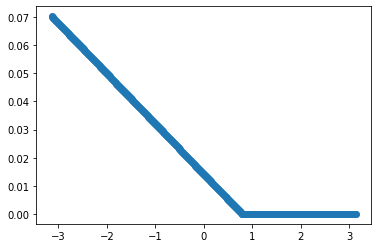

In [8]:
forw(X,False)
plt.scatter(X, act2.output)

In [9]:
METRICS["mae"](y, model.forward(X, False))

35.540004187968826

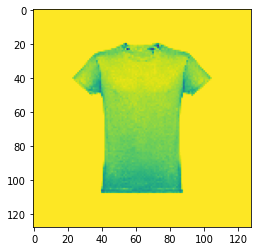

In [11]:
img = cv2.imread("./images/shirt.png")
img = cv2.resize(img, (128,128))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [12]:
from time import time
con1 = Conv2D(4, (2,2), strides=(1,1), padding=(0,0), input_shape=(1,128,128,1))
start = time()
for i in range(1):
	conv1 = con1.forward(img)
	#conv2 = Conv2D(4, (2,2), strides=(2,2), padding=(0,0), input_shape=(1,127,127,1)).forward(conv1)
print(time() - start)
plt.imshow(conv1)

TypeError: __init__() got an unexpected keyword argument 'input_shape'

# Speed Comparison

In [ ]:
import tensorflow as tf
modeltf = tf.keras.models.Sequential()
#modeltf.add(tf.keras.layers.Conv2D(512, kernel_size=(2,2), input_shape=(128,128,3)))
modeltf.add(tf.keras.layers.Dense(128, input_shape=(1,), activation="tanh"))
modeltf.add(tf.keras.layers.Dense(1))
modeltf.summary()

In [ ]:
modeltf.compile("adam", loss="mse", metrics=["acc"])
modeltf.fit(np.array(X), np.array(y), epochs=5, batch_size=256)

In [ ]:
plt.scatter(X, modeltf.predict(np.array(X)))